## Decision Trees
***Problem*** **Titanic Survior Prediction Kaggle Challenge** 
** Learning Goal**
- How to pre-process data?
    - Dropping not useful features
    - Filling the missing values (Data Imputation)
- Creating a Binary Decision Tree From Scratch

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('./titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
 data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.shape

(891, 12)

In [7]:
cols_to_drop = ["Cabin",'Name','Ticket', 'Embarked', 'PassengerId']

In [8]:
data_cleaned = data.drop(cols_to_drop, axis = 1)

In [9]:
data_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
data_cleaned['Sex'] = le.fit_transform(data_cleaned['Sex'])

In [12]:
data_cleaned # converted male -> 1 and female => 0

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,NaN,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [13]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


###  Filling Missing Values In Age Column

In [14]:
data_cleaned = data_cleaned.fillna(data_cleaned['Age'].mean())

In [15]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [16]:
data_cleaned.loc[2] # data in 2nd row

Survived     1.000
Pclass       3.000
Sex          0.000
Age         26.000
SibSp        0.000
Parch        0.000
Fare         7.925
Name: 2, dtype: float64

In [17]:
input_cols = ['Pclass','Sex','Age','SibSp','Parch','Fare']
output_cols = ['Survived']
X = data_cleaned[input_cols]
Y = data_cleaned[output_cols]
X.shape, Y.shape

((891, 6), (891, 1))

### Defining Entropy and Information Gain
- entropy is maximum at 0.5

In [18]:
def entropy(col):
    counts = np.unique(col, return_counts = True)
    N = float(col.shape[0])
    entrop = 0.0
    for ix in counts[1]:
        p = ix/N
        entrop+= (-1.0*p*np.log2(p))
   
    return entrop

In [19]:
col = np.array([1,1,0,0,1,0])
entropy(col)

1.0

In [20]:
def divide_data(x_data, fkey, fval):
    # work with pandas data frame
    x_right = pd.DataFrame([], columns=x_data.columns)
    x_left = pd.DataFrame([], columns = x_data.columns)
    
    for ix in range(x_data.shape[0]):
        val = x_data[fkey].loc[ix]
        
        if val >  fval:
            x_right = x_right.append(x_data.loc[ix])
        else:
            x_left = x_left.append(x_data.loc[ix])
    return x_left, x_right

In [21]:
x_left, x_right = divide_data(data_cleaned[:10],'Sex', 0.5)
print(x_left) # Splitted data on basis sex = 0
print(x_right) # splitted data on basis of sex = 1

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare
1       1.0     1.0  0.0  38.0    1.0    0.0  71.2833
2       1.0     3.0  0.0  26.0    0.0    0.0   7.9250
3       1.0     1.0  0.0  35.0    1.0    0.0  53.1000
8       1.0     3.0  0.0  27.0    0.0    2.0  11.1333
9       1.0     2.0  0.0  14.0    1.0    0.0  30.0708
   Survived  Pclass  Sex        Age  SibSp  Parch     Fare
0       0.0     3.0  1.0  22.000000    1.0    0.0   7.2500
4       0.0     3.0  1.0  35.000000    0.0    0.0   8.0500
5       0.0     3.0  1.0  29.699118    0.0    0.0   8.4583
6       0.0     1.0  1.0  54.000000    0.0    0.0  51.8625
7       0.0     3.0  1.0   2.000000    3.0    1.0  21.0750


In [22]:
def informationGain(x_data, fkey, fval):
    left, right = divide_data(x_data, fkey, fval)
    l = float(left.shape[0])/x_data.shape[0]
    r = float(right.shape[0])/x_data.shape[0]
    # All the examples come to one side!
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -100000 # MIN information gain
    
    i_gain = entropy(x_data.Survived) - (1* entropy(left.Survived)+r*entropy(right.Survived))
    return i_gain
    

In [23]:
# Test out function
for fx in X.columns:
    print(fx)
    print(informationGain(data_cleaned,fx, data_cleaned[fx].mean()))

Pclass
-0.4700038680429278
Sex
-0.3157281959851014
Age
-0.553348794259039
SibSp
-0.28576702031361945
Parch
-0.20653035489023408
Fare
-0.17141791178810128


In [24]:
class DecisionTree:
    # constructor
    def __init__(self,depth = 0, max_depth = 5):
        #decision tree can overfit
        # training accuracy increases with increase in no. nodes
        # but in case of test, it will increase then starts decreasing after some point where validation accuracy is maximum 
        # there two approaches to fix this
        # 1. Post Prunthing = 1st grow the tree to fullest then remove those subtrees that gives poor generalization which reduces accuracy 
        # 2. Early Stopping = to stop after certian length
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None # yes/no
    
    def train(self, x_train):
        features =  ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
        info_gains = []
        
        for ix in features:
            i_gain = informationGain(x_train, ix, x_train[ix].mean())
            info_gains.append(i_gain)
            
        self.fkey = features[np.argmax(info_gains)]
        self.fval = x_train[self.fkey].mean()
        print("Making Tree Features is: ",self.fkey)
        
        #split data
        data_left, data_right = divide_data(x_train, self.fkey, self.fval)
        data_left = data_left.reset_index(drop = True)# it will make numbering like 1,2,3.. when its was 1,3,6.. on slitting
        data_right = data_right.reset_index(drop = True)
        
        # Leaf node
        if data_left.shape[0] == 0 or data_right.shape[0] == 0:
            if x_train.Survived.mean() >= 0.5:
                self.target = "Survived"
            else:
                self.target = 'Dead'
            return 
    
    # Stop early base case
        if(self.depth >= self.max_depth):
            if x_train.Survived.mean() >= 0.5:
                self.target = "Survived"
            else:
                self.target = 'Dead'
            return
        
    # Recursively building tree
        self.left = DecisionTree(depth = self.depth+1, max_depth = self.max_depth)
        self.left.train(data_left)
        
        self.right = DecisionTree(depth = self.depth+1, max_depth = self.max_depth)
        self.right.train(data_right)
        
    # Set the target at every node
        if x_train.Survived.mean() >= 0.5:
            self.target = 'Survived'
        else:
            self.target = 'Dead'
        return 
    
    def predict(self,test):
        if test[self.fkey]>self.fval: #fval is threshold value 
            # goto right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)

In [25]:
d = DecisionTree()
d.train(data_cleaned)

KeyboardInterrupt: 

### Train Validation - Test Set Split

In [26]:
split = int(0.7* data_cleaned.shape[0])
train_data = data_cleaned[:split]
test_data = data_cleaned[split:]
test_data = test_data.reset_index(drop = True)

In [27]:
print(train_data.shape,test_data.shape)

(623, 7) (268, 7)


In [28]:
dt = DecisionTree()
dt.train(train_data)

KeyboardInterrupt: 

In [ ]:
print(dt.fkey)
print(dt.fval)
print(dt.left.fkey)
print(dt.right.fkey)

In [ ]:
y_pred = []
for ix in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[ix]))

In [ ]:
y_pred

In [ ]:
y_actual = test_data[output_cols]

In [ ]:
print(y_actual)

In [ ]:
le = LabelEncoder()
y_pred = le.fit_transform(y_pred)

In [ ]:
print(y_pred)
print(y_pred.shape)

In [ ]:
y_pred = np.array(y_pred).reshape((-1,1))
y_pred.shape

In [ ]:
y_actual.shape

In [ ]:
y_pred.shape

In [ ]:
acc = np.sum(y_pred == y_actual)/y_pred.shape[0]

In [ ]:
acc

In [ ]:
acc = np.sum(np.array(y_pred) == np.array(y_actual))/y_pred.shape[0]

In [ ]:
print(acc)

### Using Sklearn

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
sk_tree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5)

In [34]:
sk_tree.fit(train_data[input_cols], train_data[output_cols])

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [35]:
sk_tree.predict(test_data[input_cols])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

In [36]:
sk_tree.score(test_data[input_cols], test_data[output_cols])

0.8283582089552238

### Visualize Decision Tree

In [37]:
# import pydotplus
# from IPython.display import Image
# from sklearn.tree import export_graphviz

In [38]:
# from six import StringIO

In [39]:
# dot_data = StringIO()
# export_graphviz(sk_tree, out_file = dot_data, filled = True, rounded = True)

In [40]:
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())

### Random Forest
- If we dont control the size of the tree then it may lead to $overfitting$
- Overfitting will give good performance on training data but not on test set
- Test set performance degrade after certain point this is called $\textbf{PostPruning}$ to prevent this we use random Forest
- Another problem with the Decision tree is the HIGH VARIANCE
- In high variance := Your model is going to change alot with the traing data
even if you make smaller change in the training data it will cause high changes

----------------------------------------------------------------
- To overcome these problems with the decision tree we use multiple trees(Could be of different Sizes)
and we call this as a Forest of Tree AKA Random Forest.
- Random Forest is Ensembling Technique in which we train multiple weak classifiers and then we take average of them

-----------------------------------------------------------------------
- Random Forest on Regression is done like :-
    - We choose fearture on the basis of MSE rather than gini, entropy etc,
    - Feature with minimum MSE is choosen
    - Leaf may have one or more no. of data points and we will take its mean to PREDICT THE VALUE.
    - 

In [41]:
X_train = train_data[input_cols]
Y_train = np.array(train_data[output_cols]).reshape((-1,))
X_test = test_data[input_cols]
Y_test = np.array(test_data[output_cols]).reshape((-1,))

In [42]:
sk_tree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5)
sk_tree.fit(X_train,Y_train)
sk_tree.score(X_train,Y_train) # different on trainset when no max_depth

0.8443017656500803

In [43]:
sk_tree.score(X_test,Y_test) # different On Test Set when no max_depth

0.8283582089552238

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',max_depth = 5)
rf.fit(X_train,Y_train, )
rf.score(X_train,Y_train),rf.score(X_test,Y_test) # overfitting without max_depth = 5

(0.8443017656500803, 0.835820895522388)

In [49]:
from sklearn.model_selection import cross_val_score
# n_estimators = 10  is no. of trees higher its value higher accuracy
acc = cross_val_score(RandomForestClassifier(n_estimators = 10, max_depth =5 , criterion = 'entropy'),X_train,Y_train,cv = 5).mean()

In [50]:
acc

0.8170193548387097

In [51]:
acc_list = list()
for i in range(1,50):
    acc = cross_val_score(RandomForestClassifier(n_estimators = i, max_depth =5 , criterion = 'entropy'),X_train,Y_train,cv = 5).mean()
    acc_list.append(acc)

In [52]:
acc_list

[0.7848645161290323,
 0.7416258064516129,
 0.7721161290322581,
 0.7945161290322582,
 0.7800774193548389,
 0.8121290322580645,
 0.7977161290322581,
 0.8089806451612903,
 0.8137806451612903,
 0.8265935483870969,
 0.8138064516129031,
 0.8089677419354839,
 0.8218064516129033,
 0.8170064516129033,
 0.8090322580645161,
 0.8186193548387097,
 0.8137548387096775,
 0.8041935483870967,
 0.816941935483871,
 0.8153677419354839,
 0.8185419354838709,
 0.8104903225806451,
 0.8233935483870969,
 0.8137548387096775,
 0.804116129032258,
 0.8201677419354839,
 0.8153677419354839,
 0.8137290322580645,
 0.8233935483870969,
 0.8201806451612903,
 0.824967741935484,
 0.8169548387096773,
 0.8073032258064515,
 0.8218064516129033,
 0.8201677419354839,
 0.8282064516129033,
 0.8073419354838709,
 0.8089548387096773,
 0.8137290322580645,
 0.8169677419354839,
 0.8153806451612903,
 0.8153806451612903,
 0.8233935483870967,
 0.8153419354838709,
 0.8121677419354839,
 0.8153290322580645,
 0.8233806451612903,
 0.8249677419354

In [53]:
import matplotlib.pyplot as plt


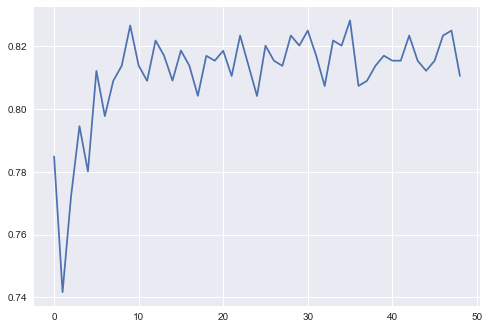

In [54]:
plt.style.use('seaborn')
plt.plot(acc_list)
plt.show()

In [ ]:
print(max(acc_list))

In [ ]:
np.argmax(acc_list)

In [ ]:
acc_list.index(0.8313935483870967)

In [ ]:
rf = RandomForestClassifier(n_estimators = 39, criterion = 'entropy', max_depth = 5 )

In [ ]:
rf.fit(X_train, Y_train)

In [ ]:
rf.score(X_train, Y_train)

In [ ]:
rf.score(X_test, Y_test)